<a href="https://colab.research.google.com/github/Rogerio-mack/Research-Literature-Review-APIs/blob/main/search_WOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Literature review from [Web of Science](https://www.webofscience.com/)

**`keyword`** = 'supply chain resilience'

<br>

**WARNING**. I have access institutional access to Web Of Science, but this do not give access to API services. Thus, here I just dowload up to 1000 results from the site which work well enough for me. 




# Get up 1000 plain text search results

* First

<img src="https://github.com/Rogerio-mack/Research-Literature-Review-APIs/raw/main/wos_1.png" width=300>

* Second

<img src="https://github.com/Rogerio-mack/Research-Literature-Review-APIs/raw/main/wos_2.png" width=300>

In [4]:
#@markdown Upload your file to Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving savedrecsWebOfScience.csv to savedrecsWebOfScience.csv
User uploaded file "savedrecsWebOfScience.csv" with length 1742651 bytes


In [78]:
import pandas as pd
df = pd.read_csv('/content/savedrecsWebOfScience.csv',sep='\t')

df.head(1)

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,SE,BS,LA,DT,CT,CY,CL,SP,HO,DE,ID,AB,C1,C3,RP,EM,RI,OI,FU,FX,CR,NR,TC,Z9,U1,U2,PU,PI,PA,SN,EI,BN,J9,JI,PD,PY,VL,IS,PN,SU,SI,MA,BP,EP,AR,DI,D2,EA,PG,WC,WE,SC,GA,UT,PM,OA,HC,HP,DA
J,"Aslam, H; Khan, AQ; Rashid, K; Rehman, SU",NaN,NaN,NaN,"Aslam, Haris; Khan, Abdul Qadeer; Rashid, Kamran; Rehman, Saif-ur",NaN,NaN,Achieving supply chain resilience: the role of supply chain ambidexterity and supply chain agility,JOURNAL OF MANUFACTURING TECHNOLOGY MANAGEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Purpose This study analyzes the role of supply chain ambidexterity (SC-Ambidexterity) in develop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOV 24,2020.0,31,6,NaN,NaN,NaN,NaN,1185,1204,NaN,10.1108/JMTM-07-2019-0263,NaN,APR 2020,NaN,NaN,NaN,NaN,NaN,WOS:000528231200001,NaN,NaN,NaN,NaN,2022-02-22,NaN


In [79]:
#@markdown Reshape the data

for c in df:
  if df[c].isnull().sum() == len(df):
    df = df.drop(columns=c)

unusual_authors = ['BA','BE','GP']
df = df.drop(columns=unusual_authors)
unusual = ['IS','PN','SU','SI']
df = df.drop(columns=unusual)
unusual = ['SO','TC','JI','PY','VL','MA','BP','EP','D2','HP']
df = df.drop(columns=unusual)

df.rename(columns={'PT':'authors','CA':'title','ID':'abstract','NR':'citationCount','PD':'year'},inplace=True)

first_authors = []

for authors in df['authors'].str.split(';'):
  if len(authors) > 1:
    first_authors.append(authors[0] + '., et. al')
  else:
    first_authors.append(authors[0] + '.')

df['first_author'] = first_authors

df['authors'] = df['authors'].str.replace(';','.,')
df['authors'] = df['authors'] + '.'

df.year = df.year.fillna(1900)
df.year = df.year.astype('int')

df.abstract = df.abstract.fillna('Unknown')

df = df.reset_index().rename(columns={'index':'type'})

df.head()

,type,authors,title,TI,abstract,citationCount,year,AR,GA,first_author
0,J,"Aslam, H., Khan, AQ., Rashid, K., Rehman, SU.",Achieving supply chain resilience: the role of supply chain ambidexterity and supply chain agility,JOURNAL OF MANUFACTURING TECHNOLOGY MANAGEMENT,Purpose This study analyzes the role of supply chain ambidexterity (SC-Ambidexterity) in develop...,16,2020,10.1108/JMTM-07-2019-0263,WOS:000528231200001,"Aslam, H., et. al"
1,J,"Wieland, A., Durach, CF.",Two perspectives on supply chain resilience,JOURNAL OF BUSINESS LOGISTICS,"More than a decade ago, other fields started to challenge the equilibrium-focused meaning of res...",21,2021,10.1111/jbl.12271,WOS:000625403900001,"Wieland, A., et. al"
2,C,"Cheng, GP., Zhu, XQ.",Research on Supply Chain Resilience Evaluation,"PROCEEDINGS OF THE 7TH INTERNATIONAL CONFERENCE ON INNOVATION AND MANAGEMENT, VOLS I AND II",This paper proposes the evaluation index system of supply chain resilience on the basis of analy...,5,2010,NaN,WOS:000290638901045,"Cheng, GP., et. al"
3,J,"Mubarik, MS., Bontis, N., Mubarik, M., Mahmood, T.",Intellectual capital and supply chain resilience,JOURNAL OF INTELLECTUAL CAPITAL,Purpose - The main objective of this study is to test whether firms with a higher level of intel...,11,1900,10.1108/JIC-06-2020-0206,WOS:000613540100001,"Mubarik, MS., et. al"
4,J,"Pereira, CR., Christopher, M., Da Silva, AL.",Achieving supply chain resilience: the role of procurement,SUPPLY CHAIN MANAGEMENT-AN INTERNATIONAL JOURNAL,Purpose - The purpose of this paper is to understand the role of procurement in identifying and ...,109,2014,10.1108/SCM-09-2013-0346,WOS:000345150800009,"Pereira, CR., et. al"


# Keyword

**Warning**. Check the Keyword selection before using this. Here is just a label for titles and plots.

In [80]:
keyword = 'all(supply chain resilience)'

In [81]:
#@markdown Final Base
wos = df.copy()

df = pd.DataFrame()

df['title'] = wos['title']
df['year'] = wos['year']
df['first_author'] = wos.first_author
df['authors'] = wos.authors
df['citationCount'] = wos['citationCount']
df['influentialCitationCount'] = 0 # none for scopus
df['abstract'] = wos.abstract
df['type'] = wos.type

print('SUMMARY SEARCH')
print(100*'-')
print(' Base: ', 'Web of Science Download File')
print(' keyword: ', keyword)
print(' Fields: ', wos.columns)
print()
print('RESULTS')
print(100*'-')

pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100


display(df[['title', 'year', 'first_author', 'authors', 'citationCount', 'influentialCitationCount']].head())


SUMMARY SEARCH
----------------------------------------------------------------------------------------------------
 Base:  Web of Science Download File
 keyword:  all(supply chain resilience)
 Fields:  Index(['type', 'authors', 'title', 'TI', 'abstract', 'citationCount', 'year',
       'AR', 'GA', 'first_author'],
      dtype='object')

RESULTS
----------------------------------------------------------------------------------------------------


,title,year,first_author,authors,citationCount,influentialCitationCount
0,Achieving supply chain resilience: the role of supply chain ambidexterity and supply chain agility,2020,"Aslam, H., et. al","Aslam, H., Khan, AQ., Rashid, K., Rehman, SU.",16,0
1,Two perspectives on supply chain resilience,2021,"Wieland, A., et. al","Wieland, A., Durach, CF.",21,0
2,Research on Supply Chain Resilience Evaluation,2010,"Cheng, GP., et. al","Cheng, GP., Zhu, XQ.",5,0
3,Intellectual capital and supply chain resilience,1900,"Mubarik, MS., et. al","Mubarik, MS., Bontis, N., Mubarik, M., Mahmood, T.",11,0
4,Achieving supply chain resilience: the role of procurement,2014,"Pereira, CR., et. al","Pereira, CR., Christopher, M., Da Silva, AL.",109,0


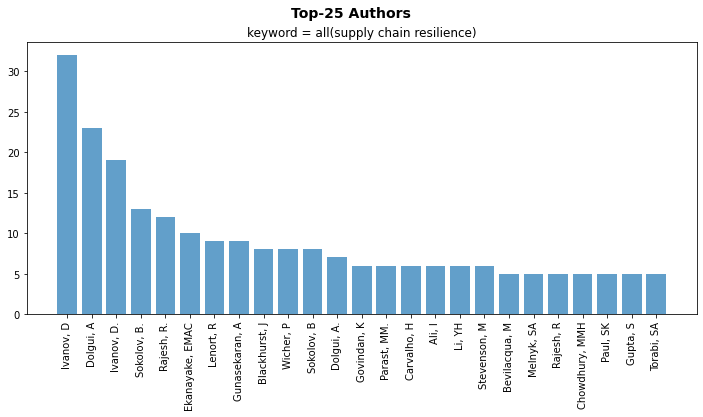

In [71]:
#@markdown  
import matplotlib.pyplot as plt
%matplotlib inline

authors_dic = {}
for authors in df['authors']:
  authors_list = authors.split('.,')
  for author in authors_list:
    a = author.lstrip().rstrip() # remove white spaces before and after
    if a not in authors_dic.keys():    
      authors_dic[a] = 1                    
    else:                                  
      authors_dic[a] =  authors_dic[a] + 1

# print(list(authors_dic.items())[:10])   

df_authors_count = pd.DataFrame(authors_dic.items(),  columns=['author', 'count']).sort_values('count',ascending=False)
df_authors_count = df_authors_count.sort_values('count',ascending=False)
df_authors_count = df_authors_count.reset_index(drop=True)
# df_authors_count.head()

df_authors_count = df_authors_count[df_authors_count.author != ''] # clear articles without authors!

df_authors_count = df_authors_count.head(25)

plt.figure(figsize=(12,5))
plt.bar(x=df_authors_count['author'], height=df_authors_count['count'],alpha=0.7)

plt.suptitle('Top-25 Authors', fontsize=14, weight='bold')
plt.title('keyword = ' + keyword, fontsize=12)
plt.xticks(rotation=90)
plt.show()



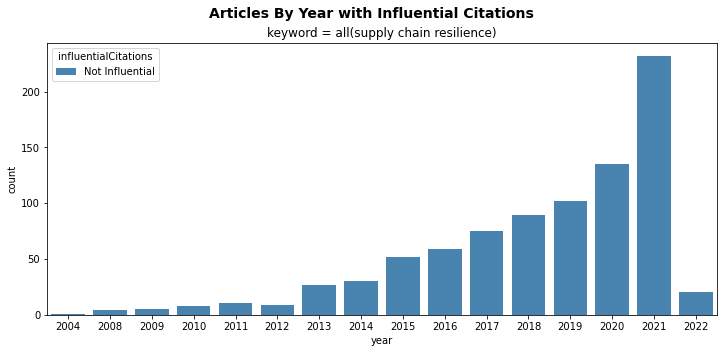

In [72]:
#@markdown  
import seaborn as sns

df_2000 = df[ df.year > 2000 ].copy()
df_2000['influentialCitations'] = df.influentialCitationCount > 0
df_2000['influentialCitations'] = df_2000['influentialCitations'].replace(True, 'Influential')
df_2000['influentialCitations'] = df_2000['influentialCitations'].replace(False, 'Not Influential')

plt.figure(figsize=(12,5))
sns.countplot(x='year', hue='influentialCitations', data=df_2000, palette=sns.color_palette("Blues_r",2))

plt.suptitle('Articles By Year with Influential Citations', fontsize=14, weight='bold')
plt.title('keyword = ' + keyword, fontsize=12)
plt.show()


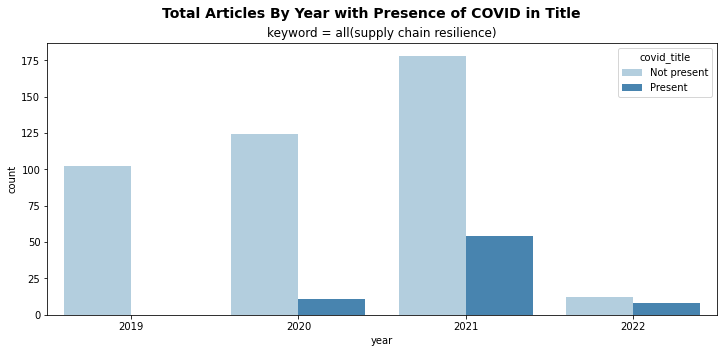

In [73]:
#@markdown  
df_covid = df_2000[ (df_2000.year >= 2019) ].copy() 

df_covid['covid_title'] = df_covid['title'].str.lower().str.count('covid') > 0
df_covid['covid_title'] = df_covid['covid_title'].replace(True, 'Present')
df_covid['covid_title'] = df_covid['covid_title'].replace(False, 'Not present')

plt.figure(figsize=(12,5))
sns.countplot(x='year', hue='covid_title', data=df_covid, palette=sns.color_palette("Blues",2))

plt.suptitle('Total Articles By Year with Presence of COVID in Title', fontsize=14, weight='bold')
plt.title('keyword = ' + keyword, fontsize=12)
plt.show()

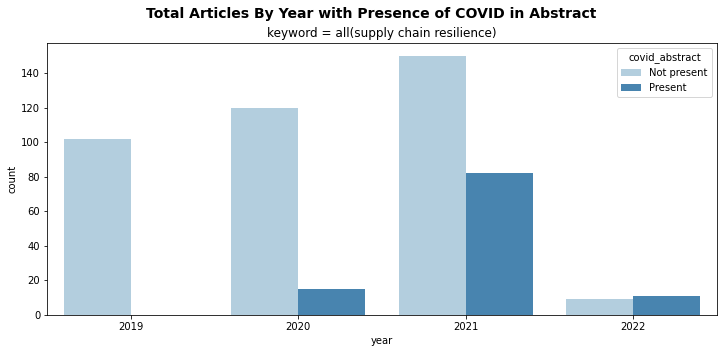

In [74]:
#@markdown  
df_covid_abstract = df_2000[ (df_2000.year >= 2019) ].copy() 

df_covid_abstract['covid_abstract'] = df_covid_abstract['abstract'].str.lower().str.count('covid') > 0
df_covid_abstract['covid_abstract'] = df_covid_abstract['covid_abstract'].replace(True, 'Present')
df_covid_abstract['covid_abstract'] = df_covid_abstract['covid_abstract'].replace(False, 'Not present')

plt.figure(figsize=(12,5))
sns.countplot(x='year', hue='covid_abstract', data=df_covid_abstract, palette=sns.color_palette("Blues",2))

plt.suptitle('Total Articles By Year with Presence of COVID in Abstract', fontsize=14, weight='bold')
plt.title('keyword = ' + keyword, fontsize=12)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




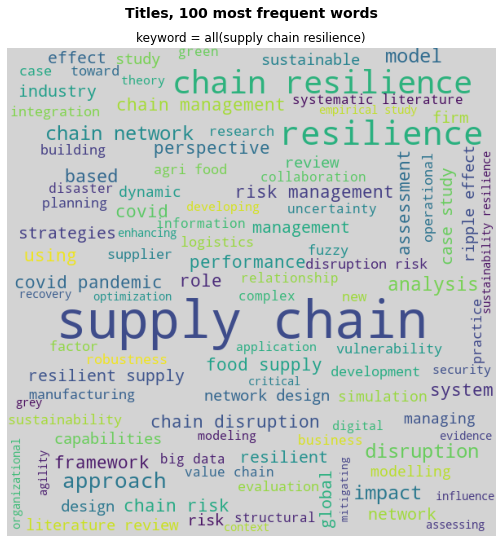

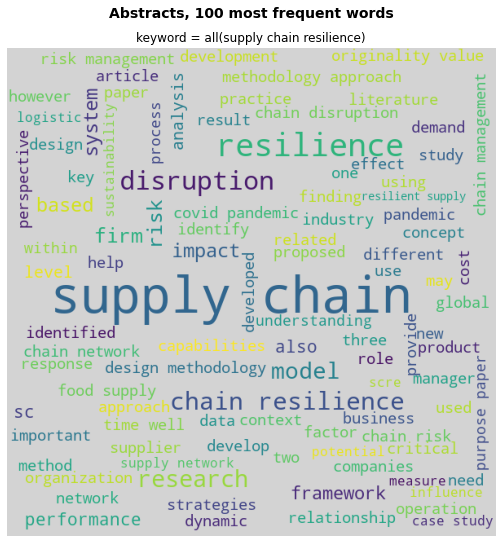

In [82]:
#@markdown 
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def word_cloud(df,df_column,plot_title='Word Cloud',limit=100):

  stopwords_set = set( stopwords.words('english'))

  texto_string = ''
  for texto in df[df_column]:
    texto_string = texto_string + ' ' + texto.lower()  

  wordcloud = WordCloud(width = 600, height = 600,
          background_color ='lightgrey',
          max_words=limit,
          stopwords = stopwords_set,
          min_font_size = 10).generate(texto_string)

  print('\n')
  plt.figure(figsize = (7, 7), facecolor = None)
  plt.suptitle(plot_title, fontsize=14, weight='bold', y=1.05)
  plt.title('keyword = ' + keyword, fontsize=12)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

  return

word_cloud(df,'title',plot_title='Titles, 100 most frequent words')
word_cloud(df,'abstract',plot_title='Abstracts, 100 most frequent words')

